In [519]:
#importing libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [520]:
#reading data from CSV file
data = pd.read_csv('ALS_TrainingData_2223.csv')
data

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,24.0,22.0,18.0,0.020906,31,27.5,23.0,0.027875,30.0,28.0,25.0,0.017422,8.0322,7.11945,6.57180,0.005089,90,83.0,69,0.055556,160,139.0,129,0.082011,2.49500,2.220550,2.22055,0.000956,109.0,...,146.0,143.0,0.045296,8,6.5,4,0.010582,5,3.5,0,0.013228,-1023,1,172,169.0,152.0,4.5,4.25,4.0,0.001742,79,68.0,61,0.047619,4,3.0,3,0.002646,148.0,145.5,143.0,0.017422,533,8,7.0,7,0.002646,6.00,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,25.0,13.0,8.0,0.029617,31,17.0,14.0,0.029617,32.0,28.0,25.0,0.012195,8.3973,4.74630,4.01610,0.007633,80,78.0,64,0.028725,140,132.5,104,0.064632,2.32035,2.170650,2.02095,0.000522,108.0,...,132.0,128.0,0.017422,8,7.5,3,0.008977,9,8.0,4,0.008977,-341,1,286,264.0,230.0,5.0,4.30,3.9,0.001916,90,76.0,64,0.046679,4,4.0,3,0.001795,142.0,138.0,136.0,0.010453,649,8,7.0,5,0.005386,7.00,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,25.0,20.0,14.0,0.019643,24,19.0,18.0,0.010714,35.0,29.0,24.0,0.019643,5.4765,4.38120,3.65100,0.003260,86,76.0,58,0.050000,120,110.0,90,0.053571,2.47005,2.295400,2.19560,0.000490,108.0,...,154.0,151.0,0.017857,4,3.0,2,0.003571,10,7.0,4,0.010714,-1181,1,233,213.0,167.0,4.1,4.00,3.9,0.000357,82,73.0,60,0.039286,4,4.0,4,0.000000,145.0,143.0,140.0,0.008929,1234,5,0.0,0,0.008929,6.00,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,62.0,60.0,41.0,0.052369,46,40.0,33.0,0.032419,23.0,20.0,20.0,0.007481,8.0322,8.03220,6.57180,0.003642,90,80.0,70,0.049875,150,130.0,120,0.074813,2.47005,2.345300,2.23000,0.000474,109.0,...,145.0,144.0,0.024938,4,3.5,2,0.004988,12,12.0,12,0.000000,-365,2,275,233.0,204.0,4.3,4.20,4.0,0.000748,84,72.0,68,0.039900,3,3.0,3,0.000000,143.0,139.0,138.0,0.012469,2492,5,5.0,3,0.004988,7.00,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,38.0,26.5,22.0,0.026534,35,26.5,20.0,0.024876,32.0,28.0,23.0,0.014925,5.1114,4.19865,3.65100,0.002422,100,80.0,68,0.053068,160,130.0,104,0.092869,2.42015,2.257975,2.17065,0.000414,107.0,...,146.5,138.0,0.023217,2,2.0,0,0.003396,12,12.0,12,0.000000,-1768,2,313,283.5,268.0,4.6,3.75,3.5,0.001824,101,96.0,74,0.044776,4,4.0,3,0.001698,143.0,140.0,138.0,0.008292,2956,6,4.0,1,0.008489,6.00,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2419,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,0.009107,46.0,27.0,18.0,0.049123,38,27.0,23.0,0.026316,31.0,28.0,23.0,0.014035,5.4765,3.65100,2.92080,0.004484,85,78.0,70,0.027322,150,115.0,100,0.091

In [521]:
#check of null values
data.isnull().values.any()

False

In [522]:
#check of duplication 
data.duplicated().sum()

0

##Perform Summary and Preliminary Visualization.

In [523]:
#describe the dataset
data.describe()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,1214.874944,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,0.026035,54.436257,32.993252,23.014800,0.071137,43.127755,29.076923,21.542465,0.049191,30.897301,26.963765,23.164327,0.016868,7.353054,5.558011,4.160875,0.007133,92.030589,81.113360,69.890688,0.047658,147.135403,129.579172,113.429600,0.071178,2.474835,2.345584,2.222855,0.000541,107.152182,...,144.289024,135.461130,0.038242,5.309942,4.049708,2.493477,0.006163,10.743140,9.703329,7.778228,0.006595,-682.995502,1.800720,285.301844,238.781601,208.382005,4.628367,4.189269,3.857323,0.001744,90.642375,76.973234,65.373819,0.053587,3.910031,3.592668,2.791273,0.002513,143.428880,140.145254,136.755061,0.015000,498880.290148,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,696.678300,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,0.016156,44.829577,15.601925,11.231221,0.110889,35.288701,9.593911,7.395303,0.084100,3.164472,2.198824,2.408519,0.011280,2.319538,1.335236,1.354256,0.005070,8.758227,7.245578,8.443662,0.027282,15.754048,12.160938,11.195037,0.033110,0.180246,0.088418,0.172787,0.000481,2.616967,...,11.602846,14.890612,0.035134,2.244651,2.280781,2.124570,0.004372,1.897501,2.771850,3.740073,0.006128,411.800405,0.419334,70.175312,52.626504,49.321238,1.325412,0.243075,0.263050,0.002898,11.104866,8.437749,7.763446,0.027403,0.298516,0.612385,1.055428,0.002477,2.333157,1.789886,2.715247,0.009283,289923.528450,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222
min,1.000000,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,0.000000,10.000000,8.000000,1.600000,0.002747,11.000000,9.000000,1.000000,0.000000,20.000000,19.500000,2.500000,0.000000,2.920800,2.190600,0.584160,0.000000,70.000000,56.000000,20.

In [524]:
#information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Columns: 101 entries, ID to Urine.Ph_min
dtypes: float64(75), int64(26)
memory usage: 1.7 MB


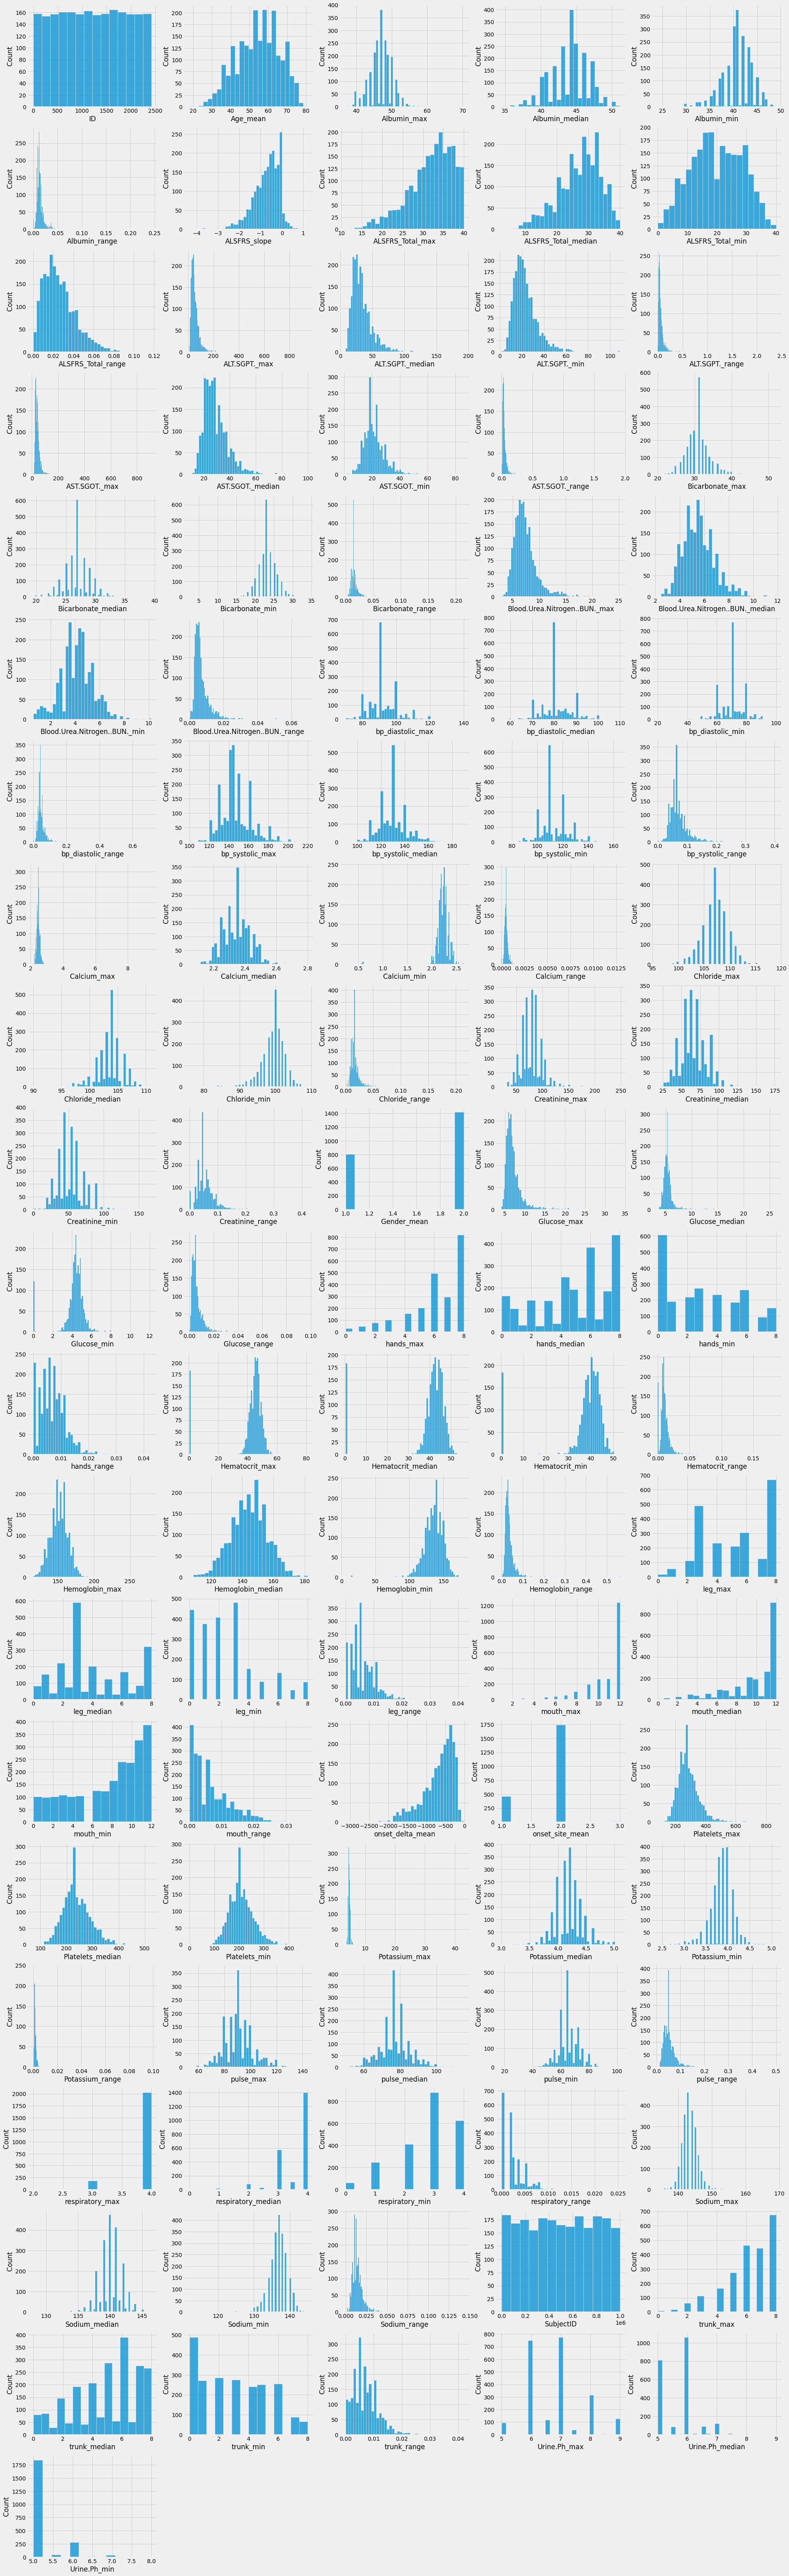

In [525]:
#display histogram
plt.figure(figsize=(30,130))
for index, i in enumerate(data.columns):
        if(data[i].dtype == np.float64 or data[i].dtype == np.int64):
              ax = plt.subplot(25,5, index+1)
              sns.histplot(data[i], ax=ax)
              plt.xlabel(i)
plt.show()

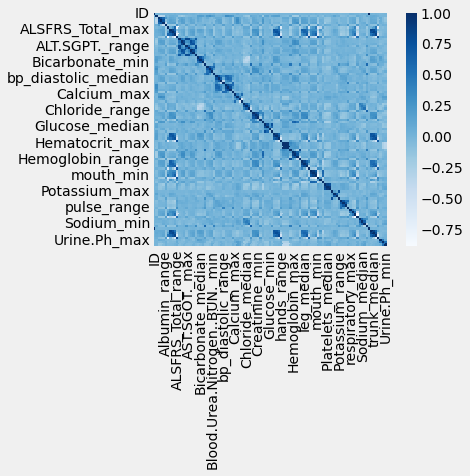

In [526]:
#display correlation heatmap
sns.heatmap(data.corr(),square = True,cmap='Blues')

In [527]:
X = data.drop(['ID', 'ALSFRS_slope'], axis=1)  # features
y = data.iloc[:,6]    # target variable

In [528]:
#reading data from CSV file
test_data = pd.read_csv('ALS_TestingData_78.csv')
test_data

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Basophils_max,Basophils_median,Basophils_min,Basophils_range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Bilirubin..total._max,Bilirubin..total._median,Bilirubin..total._min,Bilirubin..total._range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,BMI_max,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,...,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,Red.Blood.Cells..RBC._max,Red.Blood.Cells..RBC._median,Red.Blood.Cells..RBC._min,Red.Blood.Cells..RBC._range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
0,3,65.906849,46.0,44.0,43,0.024590,-1.767329,33,5.0,2,0.028519,93,26.0,22,0.581967,72,24.0,21,0.418033,0.8,0.5,0.3,0.004098,27.0,25.0,23.0,0.032787,9.00,7.00,3.00,0.049180,7.900,7.100,5.700,0.018033,0.002969,91,76.0,69,0.180328,...,2,0.005520,-617,1,275,275.0,275,4.3,4.20,3.9,0.003279,90,77.0,61,0.237705,4700,4640,4450,2.049180,4,0.0,0,0.003680,139,138.0,137,0.016393,55888,7,0.0,0,0.006440,6.5,6.00,6.0,0.004098,8.57,7.680,6.60,0.016148
1,4,54.000000,39.0,36.0,33,0.013100,-1.351852,32,23.0,14,0.039301,47,35.5,21,0.056769,49,33.0,20,0.063319,1.2,0.7,0.3,0.001965,26.7,25.0,21.0,0.012445,19.00,9.50,5.00,0.030568,5.700,4.300,3.400,0.005022,0.002907,106,96.0,75,0.067686,...,11,0.002183,-328,4,349,270.0,215,4.6,4.20,3.8,0.001747,104,80.0,68,0.078603,5800,5100,4700,2.401747,4,4.0,3,0.002183,144,140.5,135,0.019651,61505,6,3.0,0,0.013100,6.5,5.50,5.0,0.003275,8.04,6.620,4.97,0.006703
2,5,56.394521,46.0,43.0,39,0.009736,-0.412429,15,10.0,2,0.017173,42,22.0,11,0.043115,37,22.0,14,0.031989,1.4,0.7,0.5,0.001252,27.0,24.0,20.0,0.009736,5.00,3.00,2.00,0.004172,8.200,5.400,2.900,0.007371,0.002281,85,72.5,65,0.026420,...,2,0.011889,-953,2,391,391.0,391,5.2,4.50,3.8,0.001947,123,103.5,70,0.070013,5130,4590,4190,1.307371,4,4.0,0,0.005284,141,139.0,136,0.006954,63255,0,0.0,0,0.000000,7.5,6.75,6.0,0.003456,8.90,7.160,5.01,0.005410
3,6,72.619178,50.0,42.5,41,0.092784,-0.383403,34,24.0,21,0.033592,109,39.5,20,0.917526,83,42.0,23,0.618557,0.9,0.7,0.3,0.006186,27.0,26.0,25.0,0.020619,9.00,5.00,3.00,0.061856,7.500,5.200,3.900,0.037113,0.002408,67,59.0,54,0.134021,...,2,0.015504,-490,1,383,383.0,383,4.8,4.50,4.4,0.004124,76,73.0,63,0.134021,4190,3950,3780,4.226804,4,4.0,3,0.002584,143,140.0,138,0.051546,70641,8,5.5,5,0.007752,7.5,7.00,6.0,0.024194,12.38,7.905,4.96,0.076495
4,9,65.000000,45.0,42.0,36,0.021327,0.000000,37,37.0,37,0.000000,48,16.5,13,0.082938,272,25.0,22,0.592417,1.1,0.8,0.6,0.001185,27.4,22.9,19.3,0.019194,12.00,9.50,5.00,0.016588,7.500,6.100,4.500,0.007109,0.002731,102,85.0,69,0.078199,...,12,0.000000,-329,4,357,258.0,229,5.1,4.45,4.1,0.002370,84,67.5,59,0.059242,5000,4700,4400,1.421801,4,4.0,4,0.000000,146,144.0,140,0.014218,108342,7,7.0,7,0.000000,6.0,5.50,5.0,0.002370,11.53,9.290,7.94,0.008507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,96,45.000000,42.0,39.5,37,0.010823,-0.683521,33,28.0,23,0.021645,171,60.0,37,0.

In [529]:
#removing extra columns in test data
for column in test_data:
    if column in data:
        pass
    else:
        test_data=test_data.drop(columns= column)

In [530]:
test_data

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,3,65.906849,46.0,44.0,43,0.024590,-1.767329,33,5.0,2,0.028519,93,26.0,22,0.581967,72,24.0,21,0.418033,27.0,25.0,23.0,0.032787,7.900,7.100,5.700,0.018033,91,76.0,69,0.180328,134,125.0,103,0.254098,2.530,2.450,2.35,0.001475,103,...,146.0,141,0.065574,8,1.0,0,0.007360,8,4.0,2,0.005520,-617,1,275,275.0,275,4.3,4.20,3.9,0.003279,90,77.0,61,0.237705,4,0.0,0,0.003680,139,138.0,137,0.016393,55888,7,0.0,0,0.006440,6.5,6.00,6.0
1,4,54.000000,39.0,36.0,33,0.013100,-1.351852,32,23.0,14,0.039301,47,35.5,21,0.056769,49,33.0,20,0.063319,26.7,25.0,21.0,0.012445,5.700,4.300,3.400,0.005022,106,96.0,75,0.067686,160,135.0,110,0.109170,2.470,2.345,2.26,0.000459,104,...,158.0,139,0.067686,5,1.0,0,0.010917,12,12.0,11,0.002183,-328,4,349,270.0,215,4.6,4.20,3.8,0.001747,104,80.0,68,0.078603,4,4.0,3,0.002183,144,140.5,135,0.019651,61505,6,3.0,0,0.013100,6.5,5.50,5.0
2,5,56.394521,46.0,43.0,39,0.009736,-0.412429,15,10.0,2,0.017173,42,22.0,11,0.043115,37,22.0,14,0.031989,27.0,24.0,20.0,0.009736,8.200,5.400,2.900,0.007371,85,72.5,65,0.026420,140,103.0,90,0.066050,2.530,2.430,2.33,0.000278,104,...,133.5,122,0.029207,0,0.0,0,0.000000,11,6.0,2,0.011889,-953,2,391,391.0,391,5.2,4.50,3.8,0.001947,123,103.5,70,0.070013,4,4.0,0,0.005284,141,139.0,136,0.006954,63255,0,0.0,0,0.000000,7.5,6.75,6.0
3,6,72.619178,50.0,42.5,41,0.092784,-0.383403,34,24.0,21,0.033592,109,39.5,20,0.917526,83,42.0,23,0.618557,27.0,26.0,25.0,0.020619,7.500,5.200,3.900,0.037113,67,59.0,54,0.134021,148,130.0,120,0.288660,2.550,2.430,2.38,0.001753,108,...,119.0,112,0.154639,6,4.0,3,0.007752,8,4.0,2,0.015504,-490,1,383,383.0,383,4.8,4.50,4.4,0.004124,76,73.0,63,0.134021,4,4.0,3,0.002584,143,140.0,138,0.051546,70641,8,5.5,5,0.007752,7.5,7.00,6.0
4,9,65.000000,45.0,42.0,36,0.021327,0.000000,37,37.0,37,0.000000,48,16.5,13,0.082938,272,25.0,22,0.592417,27.4,22.9,19.3,0.019194,7.500,6.100,4.500,0.007109,102,85.0,69,0.078199,179,140.0,118,0.144550,2.570,2.430,2.34,0.000545,107,...,149.0,140,0.045024,8,8.0,8,0.000000,12,12.0,12,0.000000,-329,4,357,258.0,229,5.1,4.45,4.1,0.002370,84,67.5,59,0.059242,4,4.0,4,0.000000,146,144.0,140,0.014218,108342,7,7.0,7,0.000000,6.0,5.50,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,96,45.000000,42.0,39.5,37,0.010823,-0.683521,33,28.0,23,0.021645,171,60.0,37,0.290043,111,50.0,31,0.173160,25.9,23.2,21.0,0.010606,7.000,5.700,3.600,0.007359,90,85.0,80,0.021645,130,120.0,105,0.054113,2.500,2.390,2.32,0.000390,107,...,142.5,134,0.088745,5,3.0,3,0.004329,10,9.0,8,0.004329,-144,4,272,219.0,180,5.1,4.45

In [531]:
#check of null values
test_data.isnull().values.any()

False

In [532]:
#check of duplication 
test_data.duplicated().sum()

0

In [533]:
#describe the dataset
test_data.describe()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,...,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.00000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,51.589744,56.025571,45.256410,42.173077,38.910256,0.016753,-0.825866,29.807692,21.544872,14.705128,0.028159,59.076923,32.397436,22.358974,0.108998,48.333333,28.871795,21.089744,0.082340,27.921795,24.489103,21.187179,0.018107,7.719513,5.752032,4.204667,0.010031,90.564103,80.141026,67.551282,0.057330,143.500000,125.410256,108.923077,0.086263,2.543205,2.420417,2.286410,0.000720,105.243590,...,144.282051,133.705128,0.057326,4.717949,3.032051,1.679487,0.005756,10.564103,8.474359,6.24359,0.007931,-516.589744,2.602564,311.884615,282.666667,261.153846,4.643590,4.169231,3.774359,0.002279,95.961538,78.769231,64.705128,0.076282,3.846154,3.000000,1.897436,0.003678,143.192308,140.269231,137.448718,0.015560,523969.807692,5.666667,3.532051,1.871795,0.007133,7.076923,6.192308,5.564103
std,28.468910,10.514606,3.056549,3.083341,3.977815,0.013419,0.649497,6.107389,8.995015,9.532050,0.014650,34.549708,14.820431,10.741320,0.142435,32.390742,9.358459,6.265108,0.114994,2.745700,2.202812,2.285718,0.011415,2.138344,1.524767,1.290092,0.007951,8.730585,7.300995,7.315963,0.036190,14.016456,11.229525,11.176005,0.052390,0.103060,0.084125,0.103236,0.000878,2.039773,...,10.512389,11.748566,0.040642,2.323776,2.485464,2.171202,0.003540,1.813297,3.394894,4.24321,0.006029,217.304947,1.143471,78.767615,65.079605,71.993520,0.383622,0.216859,0.253513,0.001243,13.672840,9.881339,8.363664,0.047435,0.428738,1.258736,1.499695,0.003095,2.198333,1.483004,1.958315,0.009760,263604.275459,2.105445,2.511454,2.211886,0.003980,0.674570,0.572536,0.458392
min,3.000000,24.583562,38.000000,35.000000,25.000000,0.004138,-3.041667,13.000000,2.000000,0.000000,0.000000,20.000000,14.500000,8.000000,0.015075,20.000000,16.000000,12.000000,0.013453,22.100000,20.000000,16.100000,0.005208,4.600000,3.200000,1.400000,0.001614,67.000000,59.000000,52.000000,0.011530,110.000000,100.000000,80.000000,0.018051,2.100000,2.100000,1.875000,0.000208,100.000000,...,119.000000,100.000000,0.014350,0.000000,0.000000,0.000

In [534]:
X2 = test_data.drop(['ID', 'ALSFRS_slope'], axis=1)  # features
y2 = test_data['ALSFRS_slope']    # target variable

In [535]:
#Normalization
scaler = StandardScaler()
data_scaler =scaler.fit_transform(X)
test_data_scaler =scaler.fit_transform(X2)

In [536]:
#reduce the number of columns by using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
score_data= pca.fit_transform(data_scaler)
score_test_data = pca.fit_transform(test_data_scaler)

In [537]:
#create a function to perform k means clustering.
from sklearn.metrics import pairwise_distances_argmin
def KMcluster(score_data, n_clusters):
    #randomly choose clusters
    rng = np.random.RandomState(1)
    i = rng.permutation(score_data.shape[0])[:n_clusters]
    centers = score_data[i]
    
    while True:
        # assign labels based on closest center
        labels = pairwise_distances_argmin(score_data, centers)
        
        # find new centers from means of points
        new_centers = np.array([score_data[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

Centers are  [[ 2.75298015  0.01230429]
 [-2.63423365 -0.01177356]]


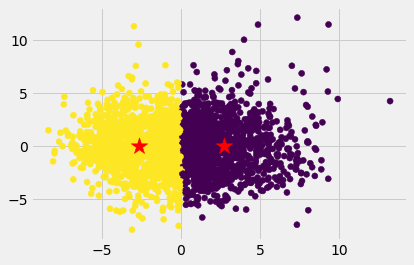

In [538]:
#k-means two clusters
centers, labels = KMcluster(score_data, 2)
print("Centers are ",centers)
plt.scatter(score_data[:, 0], score_data[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=300, c='r')

Centers are  [[ 3.13605535  1.28945507]
 [-3.09161065  0.81286542]
 [ 0.44593591 -2.6019569 ]]


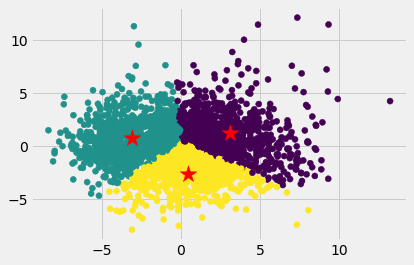

In [539]:
#k-means three clusters
centers, labels = KMcluster(score_data, 3)
print("Centers are ",centers)
plt.scatter(score_data[:, 0], score_data[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=300, c='r', )

Centers are  [[ 4.50612903 -0.40935847]
 [ 0.61238572  2.39211503]
 [-0.15586615 -2.53534089]
 [-3.87301789  0.34542899]]


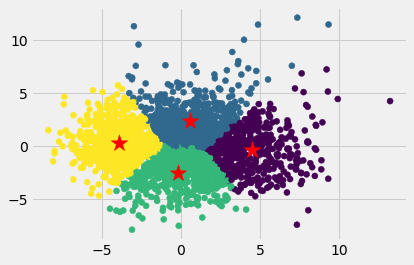

In [540]:
#k-means four clusters
centers, labels = KMcluster(score_data, 4)
print("Centers are ",centers)
plt.scatter(score_data[:, 0], score_data[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=300, c='r')

Centers are  [[ 5.25499265  0.8297538 ]
 [ 2.13011193 -2.07324146]
 [-2.0343339  -2.03751049]
 [-4.28418593  1.11491527]
 [ 0.44772302  2.34271088]]


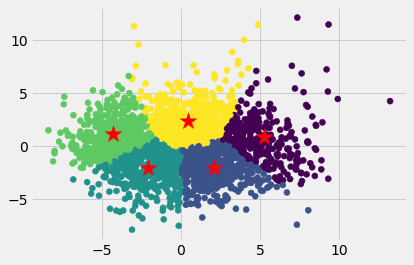

In [541]:
#k-means five clusters
centers, labels = KMcluster(score_data, 5)
print("Centers are ",centers)
plt.scatter(score_data[:, 0], score_data[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=300, c='r')

In [542]:
#Elbow method to find optimal k value
WCSS = []
for i in range(1,10):
  kmeans_pca= KMeans(n_clusters= i, init = 'k-means++', random_state=0)
  kmeans_pca.fit(score_data)
  WCSS.append(kmeans_pca.inertia_)

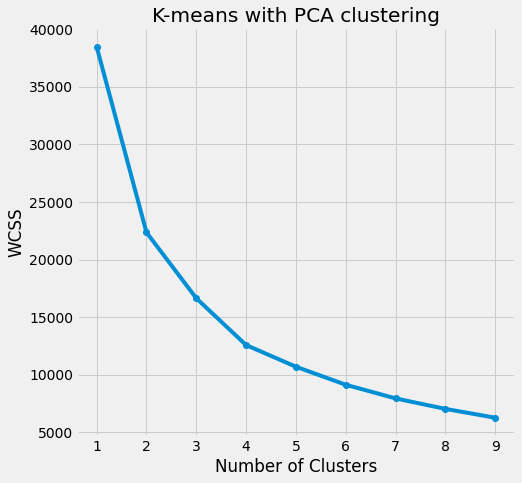

In [543]:
#Elbow method
plt.figure(figsize=(7,7))
plt.plot(range(1,10), WCSS, marker= 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA clustering')
plt.show()

In [544]:
#KMeans with best number of clusters. 
kmeans_pca= KMeans(n_clusters= 4, init = 'k-means++', random_state=0)
kmeans_pca.fit(score_data)

KMeans(n_clusters=4, random_state=0)

In [545]:
#add PCA and labels to dataset 
data_pca_kmeans = pd.concat([data.reset_index(drop = True), pd.DataFrame(score_data)], axis=1)
data_pca_kmeans.columns.values[-2: ]= ['component1', 'component2']
data_pca_kmeans['K-means PCA'] = kmeans_pca.labels_

In [546]:
data_pca_kmeans

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,...,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,component1,component2,K-means PCA
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,24.0,22.0,18.0,0.020906,31,27.5,23.0,0.027875,30.0,28.0,25.0,0.017422,8.0322,7.11945,6.57180,0.005089,90,83.0,69,0.055556,160,139.0,129,0.082011,2.49500,2.220550,2.22055,0.000956,109.0,...,8,6.5,4,0.010582,5,3.5,0,0.013228,-1023,1,172,169.0,152.0,4.5,4.25,4.0,0.001742,79,68.0,61,0.047619,4,3.0,3,0.002646,148.0,145.5,143.0,0.017422,533,8,7.0,7,0.002646,6.00,6.0,6.0,-1.597188,-2.367173,0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,25.0,13.0,8.0,0.029617,31,17.0,14.0,0.029617,32.0,28.0,25.0,0.012195,8.3973,4.74630,4.01610,0.007633,80,78.0,64,0.028725,140,132.5,104,0.064632,2.32035,2.170650,2.02095,0.000522,108.0,...,8,7.5,3,0.008977,9,8.0,4,0.008977,-341,1,286,264.0,230.0,5.0,4.30,3.9,0.001916,90,76.0,64,0.046679,4,4.0,3,0.001795,142.0,138.0,136.0,0.010453,649,8,7.0,5,0.005386,7.00,5.0,5.0,-1.542353,-4.891755,0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,25.0,20.0,14.0,0.019643,24,19.0,18.0,0.010714,35.0,29.0,24.0,0.019643,5.4765,4.38120,3.65100,0.003260,86,76.0,58,0.050000,120,110.0,90,0.053571,2.47005,2.295400,2.19560,0.000490,108.0,...,4,3.0,2,0.003571,10,7.0,4,0.010714,-1181,1,233,213.0,167.0,4.1,4.00,3.9,0.000357,82,73.0,60,0.039286,4,4.0,4,0.000000,145.0,143.0,140.0,0.008929,1234,5,0.0,0,0.008929,6.00,5.0,5.0,1.673717,-0.384583,0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,62.0,60.0,41.0,0.052369,46,40.0,33.0,0.032419,23.0,20.0,20.0,0.007481,8.0322,8.03220,6.57180,0.003642,90,80.0,70,0.049875,150,130.0,120,0.074813,2.47005,2.345300,2.23000,0.000474,109.0,...,4,3.5,2,0.004988,12,12.0,12,0.000000,-365,2,275,233.0,204.0,4.3,4.20,4.0,0.000748,84,72.0,68,0.039900,3,3.0,3,0.000000,143.0,139.0,138.0,0.012469,2492,5,5.0,3,0.004988,7.00,6.0,5.0,-1.841638,2.127717,1
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,38.0,26.5,22.0,0.026534,35,26.5,20.0,0.024876,32.0,28.0,23.0,0.014925,5.1114,4.19865,3.65100,0.002422,100,80.0,68,0.053068,160,130.0,104,0.092869,2.42015,2.257975,2.17065,0.000414,107.0,...,2,2.0,0,0.003396,12,12.0,12,0.000000,-1768,2,313,283.5,268.0,4.6,3.75,3.5,0.001824,101,96.0,74,0.044776,4,4.0,3,0.001698,143.0,140.0,138.0,0.008292,2956,6,4.0,1,0.008489,6.00,5.0,5.0,0.486813,0.212523,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2419,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,0.009107,46.0,27.0,18.0,0.049123,38,27.0,23.0,0.026316,31.0,28.0,23.0,0.014035,5.4765,3.65100,2.92080,0.004484,85,78.0,70,0.027322,150,115.0,100,0.091075,2.39520,2.3

In [547]:
data_pca_kmeans['Segment'] = data_pca_kmeans['K-means PCA'].map({0:'first',
                                                                  1:'second', 2:'third', 3:'fourth' })

Centers are  [[-0.15810749 -2.51341065]
 [ 0.61780211  2.40850234]
 [-3.87718605  0.34635668]
 [ 4.50612903 -0.40935847]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


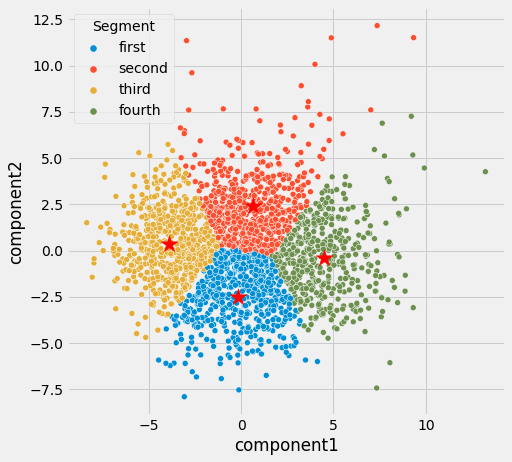

In [548]:
#visualize the best number of clusters of train data.
x_axis = data_pca_kmeans['component1']
y_axis = data_pca_kmeans['component2']
centers =kmeans_pca.cluster_centers_
print("Centers are ",centers)
plt.figure(figsize= (7,7))
sns.scatterplot(x_axis, y_axis, hue= data_pca_kmeans['Segment'])
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=300, c='r')
plt.show()

Centers are  [[-0.15810749 -2.51341065]
 [-3.87718605  0.34635668]
 [ 4.50612903 -0.40935847]
 [ 0.61780211  2.40850234]]


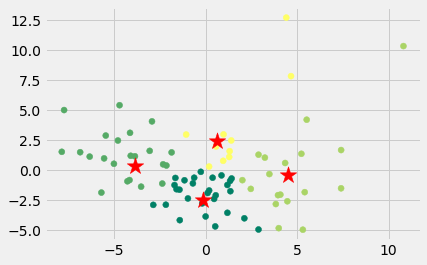

In [549]:
#visualize the best number of clusters of test data.
kmeans= KMeans(n_clusters=4)
kmeans.fit(score_data)
p_kmeans = kmeans.predict(score_test_data)
p_kmeans
plt.scatter(score_test_data[: ,0],score_test_data[: ,1],c=p_kmeans,cmap='summer',)
centers =kmeans.cluster_centers_
print("Centers are ",centers)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=300, c='r')
plt.show()

In [550]:
from sklearn.metrics import silhouette_score
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# starting at 2 clusters for silhouette coefficient
for k in range(2, 11):
      kmeans = KMeans(n_clusters=k)
      kmeans.fit(score_data)
      score = silhouette_score(score_data, kmeans.labels_)
      silhouette_coefficients.append(score)

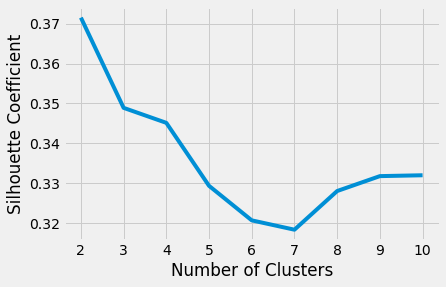

In [551]:
#visualize number of clusters vs silhouette_coefficient
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [552]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(score_data)
print('Silhoutte score of our model is ' + str(silhouette_score(score_data, kmeans.labels_)))

Silhoutte score of our model is 0.3497812701944843


In [553]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(score_data)
print('Silhoutte score of our model is ' + str(silhouette_score(score_data, kmeans.labels_)))

Silhoutte score of our model is 0.3454029589445842


In [554]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(score_test_data)
print('Silhoutte score of our model is ' + str(silhouette_score(score_test_data, kmeans.labels_)))

Silhoutte score of our model is 0.4140431267647776


In [555]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(score_test_data)
print('Silhoutte score of our model is ' + str(silhouette_score(score_test_data, kmeans.labels_)))

Silhoutte score of our model is 0.3740158274491256


In [556]:
from sklearn.metrics import davies_bouldin_score
#K-Means
kmeans = KMeans(n_clusters=3).fit(score_data) 
#store the cluster labels
labels = kmeans.labels_
print(davies_bouldin_score(score_data, kmeans.labels_))

0.9973599652187287


In [557]:
#K-Means
kmeans = KMeans(n_clusters=4).fit(score_data) 
#store the cluster labels
labels = kmeans.labels_
print(davies_bouldin_score(score_data, kmeans.labels_))

0.8898761535307862


In [558]:
#K-Means
kmeans = KMeans(n_clusters=3).fit(score_test_data) 
#store the cluster labels
labels = kmeans.labels_
print(davies_bouldin_score(score_test_data, kmeans.labels_))

0.7817893117453728


In [559]:
#K-Means
kmeans = KMeans(n_clusters=4).fit(score_test_data) 
#store the cluster labels
labels = kmeans.labels_
print(davies_bouldin_score(score_test_data, kmeans.labels_))

0.8505998746363611
